É importante ressaltar que os dados do Vigitel não devem ser analisados no Excel, do pacote Office (ou programa semelhante), pois a amostra do Vigitel leva em consideração fatores de ponderação para a análise de dados.

É necessário o uso de programas como o Epi Info ou R, ou, ainda, Stata, SPSS, SAS, entre outros, que possuem módulos de análise específicos para a utilização de fatores de ponderação

Link da base: https://svs.aids.gov.br/download/Vigitel/

trabalho relacionado que usou vigitel: https://www.scielo.br/j/ress/a/6hn69ts9c5mkPjHcGBMBbGJ/?lang=pt

referências:
artigo que usa métodos de ml para prever diabetico ou não
https://www.mdpi.com/1424-8220/22/16/6155

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 250)
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Para rodar necessário criar uma pasta na raiz da pasta "databetes_predictor" com o nome "data" e colocar o arquivo desejado ex: Vigitel-2019-peso-rake.xls

In [4]:
# read file from google drive at folder databetes
# file_path = 'drive/My Drive/databetes/Vigitel-2021-peso-rake.xls'
# file_path = 'drive/My Drive/databetes/Vigitel-2020-peso-rake.xls'
# file_path = 'drive/My Drive/databetes/Vigitel-2019-peso-rake.xls'
file_path = '../data/Vigitel-2019-peso-rake.xls'
df = pd.read_excel(file_path, sheet_name='Sheet1')

Juntar todos os anos em um dataframe só?

In [5]:
df

,chave,replica,ano,cidade,q6,q7,q8a,q8b,q8_anos,q9,q11,q12,q13,q14,r190,r128a,q15,q16,q17,q18,q19,q20,q25,q26,q27,q28,q29,q30,q31,r301_a,r301_b,r301_c,r301_d,r301_e,r301_f,r301_g,r301_h,r301_i,r301_j,r301_k,r301_l,r302_a,r302_b,r302_c,r302_d,r302_e,r302_f,r302_g,r302_h,r302_i,r302_j,r302_k,r302_l,r302_m,q35,q36,q37,q38,q39,r200,q40,q40b,q42,q43a,q43a_ou,q44,q45,q46,q47,q48,q49,r147,r148_hh,r148_mm,q50,q51,q52,q53,q54,q55,q56,r149,r150_hh,r150_mm,q59a,q59b,q59c,q60,q61,q61a,q61_fx,q61a_fx,q62,q63,q64,q67,q68,r157,r401,r401a_1,r401b_1,r401b_2,r401c_1,r401c_2,r401c_3,r402,r403,q69,q69_ou,civil,q70,q71,q74,q75,r203,r129,r130a,r174,r175,q76,r138,r202,r204,r133a,r134c,d3,r133b,r134b,d1,r176,q79a,q80,q81,q82,q88,r135,r136,r153,r137a,r154,r155,r156,r178,r179,r180,r900,r901,r901_ou,r902,moradores,adultos,fet,cat_esc,fesc,fxesc,pinterno,pesorake,q9_i,q11_i,fumante,mais20,fumocasa,fumotrab,eletronico,imc,imc_i,excpeso,excpeso_i,obesid,obesid_i,hortareg,frutareg,flvreg,cruadia,cozidadia,hortadia,sucodia,sofrutadia,frutadia,flvdia,flvreco,refritl5,feijao5,score_sf,score_sf_2cat,score_upp,score_upp_2cat,af,freq,time,ati_livre,ativo_livre,atitrans,atidom,atiocu,inativo,q51medio,q54medio,deslocdia,deslocsemana,atiocusemana,faxinasemana,af3dominios,af3dominios_insu,tv_d_3,tempo_tela_stv,q59a_horas,q59c_horas,tempo_tela_total,alcabu,direcao,direcao_alc,saruim,iddmamo,mamo,mamodois,iddpapa_old,iddpapa,papa,papatres,hart,diab,ind_med_has,med_has,trat_med_has,ind_med_db,med_db,insulina,trat_med_db
0,311666031,29,2019,27,88,1,1,3.0,3,74,168,1.0,82.0,NaN,2,2,4,2,1.0,1.0,2.0,1.0,2,3.0,4,3.0,5,3.0,1.0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,7.0,8.0,0.0,3.0,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,8.0,2.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,NaN,5,2,1,2,1,1.0,1.0,3.0,2.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2,NaN,NaN,NaN,1,1,6,6,1,1,1.0,418.377812,74,168,0,0,0,1,0,26.218821,26.218821,1.0,1,0.0,0,0,1,0,1,1,2,1,3,4,6,0,0,1,2,0,1,0,0,0.0,0.0,0.00,0,0,0,1,0,0.0,0.0,0.0,0.0,3360,0,1,0,0,0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,318136030,4,2019,27,65,1,8,NaN,0,57,159,1.0,62.0,NaN,2,2,4,5,1.0,1.0,5.0,NaN,3,2.0,5,NaN,3,1.0,1.0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4.0,2.0,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1,1.0,2.0,NaN,NaN,NaN,2.0,5.0,2,NaN,NaN,3,NaN,NaN,NaN,NaN,8.0,2.0,NaN,1,15.0,NaN,4.0,NaN,15.0,1.0,NaN,2.0,2.0,NaN,2.0,NaN,1.0,20.0,NaN,NaN,NaN,5.0,4,80,MORENO CLARO,2,2,1,3,2,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2,NaN,NaN,NaN,2,2,6,6,1,1,2.0,836.755623,57,159,1,0,0,0,0,22.546576,22.546576,0.0,0,0.0,0,0,1,0,1,0,1,1,0,1,2,0,1,1,2,0,1,0,0,0.0,0.0,0.00,0,1,0,1,0,44.5,0.0,44.5,222.5,0,0,1,0,0,0,0.0,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1321836026,6,2019,10,68,1,1,3.0,3,777,180,1.0,75.0,NaN,1,1,4,2,2.0,1.0,1.0,1.0,1,2.0,2,1.0,1,1.0,1.0,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,6.0,5.0,0.0,3.0,NaN,2,NaN,NaN,2,2.0,NaN,NaN,NaN,3.0,2.0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,2,2,1,2,1,1.0,1.0,2.0,2.0,1,1,NaN,58.0,1.0,1.0,3.0,2.0,2.0,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1.0,2.0,1,2.0,NaN,NaN,NaN,2.0,1.0,2.0,2,NaN,NaN,NaN,2,2,6,6,1,1,2.0,214.620710,67,180,0,0,0,0,0,NaN,20.679012,NaN,0,NaN,0,0,0,0,1,1,2,1,1,2,4,0,0,1,4,0,1,0,0,0.0,0.0,0.00,0,0,0,1,0,0.0,0.0,0.0,0.0,1800,0,1,0,0,0,2.5,0.0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,2323676021,16,2019,10,79,1,1,3.0,3,62,170,1.0,54.0,NaN,1,1,4,3,2.0,3.0,2.0,3.0,5,NaN,4,2.0,2,1.0,1.0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,1.0,2.0,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,3.0,2.0,NaN,

Contagem de dados nulos

In [6]:
nas_count = df.isna().sum()[df.isna().sum()>0]
nas_count = nas_count.sort_values()

In [7]:
nas_count

q59b           1
q59a           1
r179           2
q17          888
q19          888
           ...  
r401a_1    52057
r401c_1    52123
r401c_2    52123
r401c_3    52123
r901_ou    52340
Length: 105, dtype: int64

<AxesSubplot:>

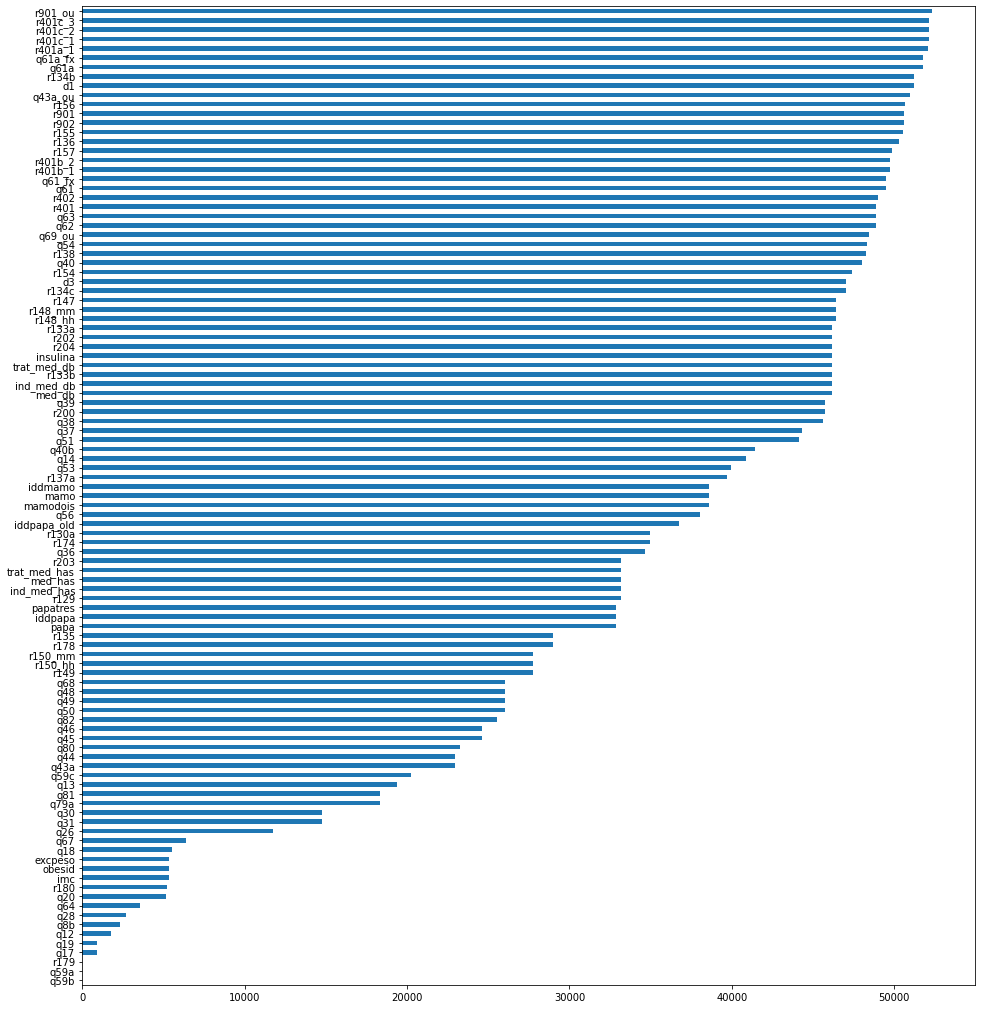

In [8]:
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
nas_count.plot(kind='barh')


In [9]:
# voltar tamanho do plot para o default
plt.rcParams['figure.figsize'] = (6.4,4.8)

colunas interessantes: ['diab','depressao','ind_med_db' 'med_db' 'insulina' 'trat_med_db']

In [10]:
diabetes_count = df['diab'].value_counts()
diabetes_count

0    46192
1     6251
Name: diab, dtype: int64

/home/gustavo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


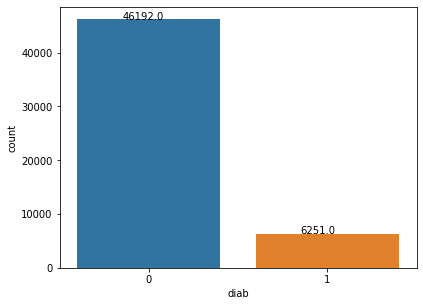

In [11]:
ax = sns.countplot(df['diab'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

## Explorar matriz de correlação

In [12]:
# erro: 'q78','q143'
# q6 e fet são sobre idade,
corr_columns= ['imc','hart','q42','q9_i','fet','r179','q60','q7','q6','diab']
df_corr = df[corr_columns]

In [13]:
df_corr = df_corr.rename(columns={"hart": "hipertensao", "q42": "ativo_fis","diab":"diabetes","q9_i":"peso"})

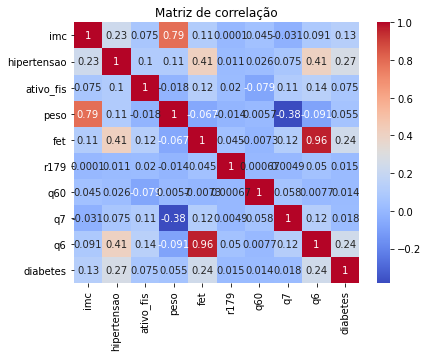

In [14]:
# Calculando a matriz de correlação
corr_matrix = df_corr.corr()

# Plotando a matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Matriz de correlação')
plt.show()

Após a normalização, a matriz de correlação se mantém a mesma, portanto não é necessário normalizar somente para visualização

## Subset para as variáveis usadas no American Diabetes Association (ADA) Risk Calculator https://www.mdcalc.com/calc/4020/american-diabetes-association-ada-risk-calculator

anos, 
gênero, 
1st degree relative with diabetes,
Hypertension,
Physically active,
BMI

In [17]:
df_ada = df[['imc','hart','q42','q9_i','diab']]
# bmi, hipertenso (1 sim 0 não). ativo (1 sim , 2 não). peso (input manual)

In [18]:
df_ada = df_ada.rename(columns={"hart": "hipertensao", "q42": "ativo_fis","diab":"diabetes","q9_i":"peso"})

In [19]:
df_ada

,imc,hipertensao,ativo_fis,peso,diabetes
0,26.218821,1,2,74,0
1,22.546576,0,2,57,0
2,NaN,1,2,67,1
3,21.453287,0,1,62,0
4,25.148605,0,1,66,0
...,...,...,...,...,...
52438,24.034407,0,1,57,0
52439,16.233072,0,1,38,0
52440,NaN,1,1,70,0
52441,NaN,1,1,75,0


<AxesSubplot:title={'center':'Contagem de valores nulos por coluna'}>

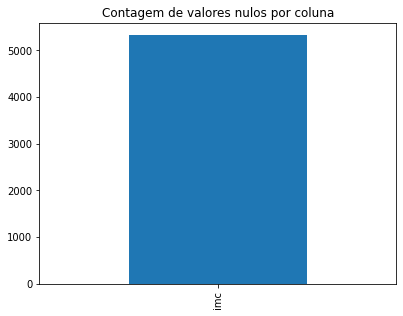

In [20]:
nas_count = df_ada.isna().sum()[df_ada.isna().sum()>0]
nas_count = nas_count.sort_values()
plt.title('Contagem de valores nulos por coluna')
nas_count.plot(kind='bar')

In [21]:
# dropar nas
df_ada = df_ada.dropna()
nas_count = df_ada.isna().sum()[df_ada.isna().sum()>0]
nas_count = nas_count.sort_values()
nas_count

Series([], dtype: int64)

In [22]:
# substituir 2 e 1 por 0 e 1
df_ada['ativo_fis'] = df_ada['ativo_fis'].replace({1: 0, 2: 1})
df_ada


<ipython-input-22-a95c3c227108>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada['ativo_fis'] = df_ada['ativo_fis'].replace({1: 0, 2: 1})


,imc,hipertensao,ativo_fis,peso,diabetes
0,26.218821,1,1,74,0
1,22.546576,0,1,57,0
3,21.453287,0,0,62,0
4,25.148605,0,0,66,0
5,24.092970,1,1,68,0
...,...,...,...,...,...
52435,27.407658,0,0,65,0
52436,31.111111,1,1,70,0
52437,28.906250,1,0,74,0
52438,24.034407,0,0,57,0


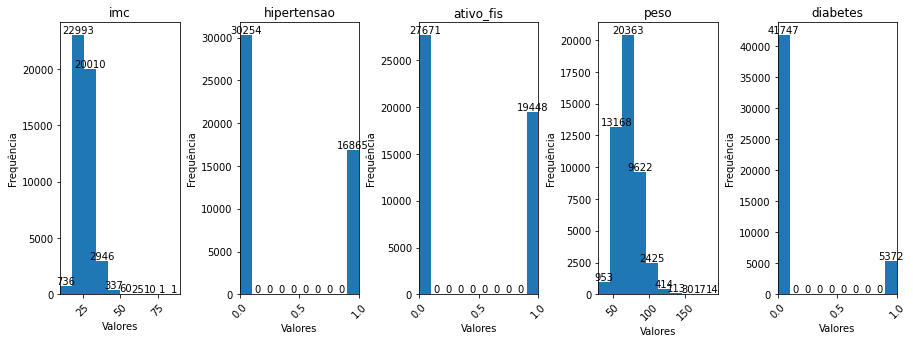

In [23]:
num_colunas = df_ada.shape[1]

# Criando um subplots com 1 linha e num_colunas colunas
fig, axs = plt.subplots(1, num_colunas, figsize=(15, 5))

# Plotando o histograma de cada coluna
for i in range(num_colunas):
    axs[i].hist(df_ada.iloc[:, i])
    axs[i].set_title(df_ada.columns[i])
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Frequência')
    axs[i].set_xlim([min(df_ada.iloc[:, i]), max(df_ada.iloc[:, i])])
    axs[i].tick_params(axis='x', labelrotation=45)

    # Adicionando a contagem de valores nas barras
    for rect in axs[i].patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        axs[i].text(x, y, f'{int(y)}', ha='center', va='bottom')

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5)
# Exibindo o gráfico
plt.show()

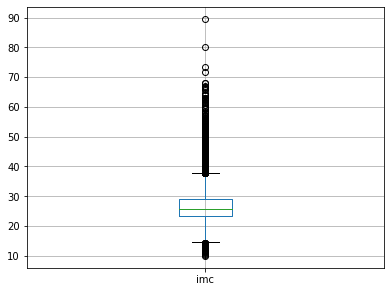

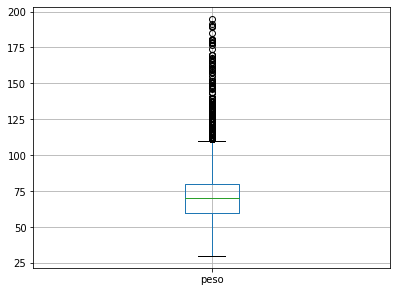

In [24]:
# boxplot do imc - algum tratamento especial pra outliers? 
for col in ['imc','peso']:
    
  df_ada.boxplot(column=col)
  # Exibindo o gráfico
  plt.show()

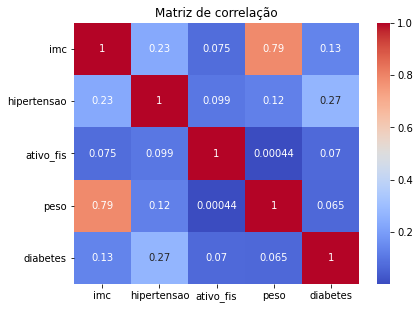

In [25]:
# Calculando a matriz de correlação
corr_matrix = df_ada.corr()

# Plotando a matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Matriz de correlação')
plt.show()


In [26]:
# normalização

# Criando um objeto scaler
scaler = MinMaxScaler()

# Selecionando as colunas para normalização
cols_to_normalize = ['imc','peso']

# Aplicando a normalização min-max nas colunas selecionadas
df_ada[cols_to_normalize] = scaler.fit_transform(df_ada[cols_to_normalize])

<ipython-input-26-3bade5bd9084>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada[cols_to_normalize] = scaler.fit_transform(df_ada[cols_to_normalize])
/home/gustavo/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [27]:
df_ada

,imc,hipertensao,ativo_fis,peso,diabetes
0,0.204128,1,1,0.266667,0
1,0.158016,0,1,0.163636,0
3,0.144288,0,0,0.193939,0
4,0.190690,0,0,0.218182,0
5,0.177434,1,1,0.230303,0
...,...,...,...,...,...
52435,0.219056,0,0,0.212121,0
52436,0.265560,1,1,0.242424,0
52437,0.237874,1,0,0.266667,0
52438,0.176699,0,0,0.163636,0


In [28]:
# Vamos primeiro separar as variáveis independentes (features) da variável dependente (target):
X = df_ada.drop('diabetes', axis=1)
y = df_ada['diabetes']

In [29]:
def train_model(X, y, model_type='logistic_regression', grid_search=False):
    # Dividindo os dados em treino, validação e teste
    train_ratio = 0.75
    validation_ratio = 0.15
    test_ratio = 0.10

    # train é 75% do dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)

    # test é 10% do dataset inicial
    # validation é 10% do dataset inicial
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42) 

    print(X_train, X_val, X_test)
    if model_type == 'logistic_regression':
        # Criando o modelo de Regressão Logística
        model = LogisticRegression(random_state=42)
        params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
    elif model_type == 'random_forest':
        # Criando o modelo de Random Forest
        model = RandomForestClassifier(random_state=42,max_depth=15)
        params = {'n_estimators': [100, 300, 500], 'max_depth': [5, 10,15, 20], 'min_samples_leaf': [1, 3, 5]}

    if grid_search:
        # Definindo os parâmetros para busca
        grid_search_cv = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=-1)

        # Treinando o modelo com a busca em grid
        grid_search_cv.fit(X_train, y_train)

        # Selecionando o melhor modelo encontrado na busca em grid
        model = grid_search_cv.best_estimator_

    # Treinando o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Avaliando o modelo nos dados de validação
    y_pred = model.predict(X_val)

    return model, X_val, X_test, y_val,y_pred, y_test

In [30]:
def print_classification_report(y_val, y_val_pred):
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred)
    print("Acurácia na validação: {:.2f}%".format(val_accuracy * 100))
    print("Acurácia balanceada na validação: {:.2f}%".format(val_balanced_accuracy * 100))

    # Gerando o relatório com diversas métricas
    report = classification_report(y_val, y_val_pred)

    # Exibindo o relatório
    print(report)
    
    # Plotando a matriz de confusão
    matriz_confusão = confusion_matrix(y_val, y_val_pred)
    sns.heatmap(matriz_confusão, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    plt.close()
    

In [31]:
model, X_val, X_test, y_val,y_pred, y_test = train_model(X, y)

            imc  hipertensao  ativo_fis      peso
22512  0.266944            1          1  0.333333
15350  0.184948            0          0  0.303030
33239  0.195841            0          0  0.200000
9066   0.161668            0          0  0.218182
43407  0.244027            0          0  0.357576
...         ...          ...        ...       ...
12131  0.208577            0          0  0.272727
49962  0.173520            0          0  0.254545
42859  0.231109            0          1  0.393939
888    0.235720            0          1  0.339394
18120  0.203581            0          0  0.260606

[35339 rows x 4 columns]             imc  hipertensao  ativo_fis      peso
36012  0.218254            0          1  0.242424
40949  0.237061            0          0  0.254545
52377  0.197482            0          0  0.278788
23895  0.155767            0          0  0.127273
1914   0.159691            1          0  0.187879
...         ...          ...        ...       ...
27160  0.213026         

Acurácia na validação: 88.07%
Acurácia balanceada na validação: 50.04%
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6227
           1       0.25      0.00      0.00       841

    accuracy                           0.88      7068
   macro avg       0.57      0.50      0.47      7068
weighted avg       0.81      0.88      0.83      7068



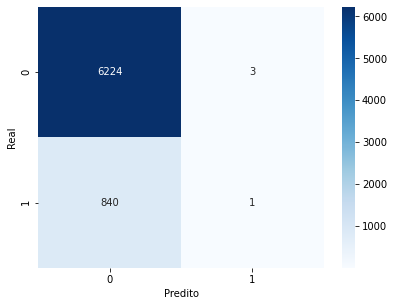

In [32]:
print_classification_report(y_val, y_pred)

In [33]:
print(f'\n os pesos do modelo são:{model.coef_[0]} e o bias é {model.intercept_[0]}')


 os pesos do modelo são:[ 4.01674491  1.6035792   0.2743044  -0.82386396] e o bias é -3.6742799354430202


Balanceamento de classes

In [34]:

# Separando as classes majoritária e minoritária
df_majority = df_ada[df_ada['diabetes'] == 0]
df_minority = df_ada[df_ada['diabetes'] == 1]

# Fazendo o downsample da classe majoritária
df_majority_downsampled = resample(df_majority, replace=False, n_samples=df_minority.shape[0], random_state=42)

# Concatenando as classes majoritária e minoritária
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separando os dados de entrada (X) e a variável a ser prevista (y)
X = df_downsampled.drop('diabetes', axis=1)
y = df_downsampled['diabetes']

/home/gustavo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


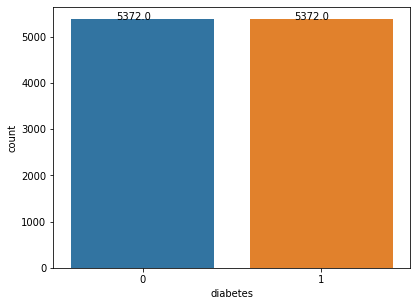

In [35]:
ax = sns.countplot(df_downsampled['diabetes'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [36]:
model, X_val, X_test, y_val,y_pred, y_test = train_model(X, y)
print("Parâmetros do modelo :")
print(model.get_params())

            imc  hipertensao  ativo_fis      peso
51765  0.146291            0          1  0.187879
17188  0.201005            0          0  0.236364
40649  0.320573            0          0  0.454545
1683   0.179048            0          1  0.242424
17841  0.309396            0          0  0.424242
...         ...          ...        ...       ...
3324   0.190073            1          0  0.242424
17200  0.244103            1          0  0.315152
88     0.188993            1          0  0.266667
47020  0.178366            0          0  0.212121
17060  0.242091            1          0  0.260606

[8058 rows x 4 columns]             imc  hipertensao  ativo_fis      peso
38089  0.326165            0          1  0.375758
23700  0.143089            0          0  0.187879
4011   0.189325            1          0  0.236364
23024  0.178044            1          0  0.169697
30177  0.237656            1          1  0.212121
...         ...          ...        ...       ...
4243   0.232075          

Acurácia na validação: 69.58%
Acurácia balanceada na validação: 69.59%
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       806
           1       0.69      0.72      0.70       805

    accuracy                           0.70      1611
   macro avg       0.70      0.70      0.70      1611
weighted avg       0.70      0.70      0.70      1611



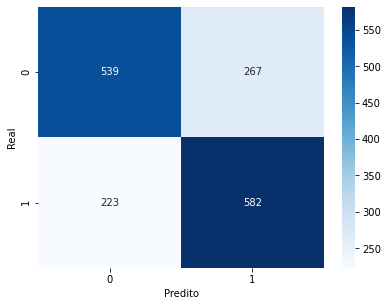

In [37]:
print_classification_report(y_val, y_pred)

            imc  hipertensao  ativo_fis      peso
51765  0.146291            0          1  0.187879
17188  0.201005            0          0  0.236364
40649  0.320573            0          0  0.454545
1683   0.179048            0          1  0.242424
17841  0.309396            0          0  0.424242
...         ...          ...        ...       ...
3324   0.190073            1          0  0.242424
17200  0.244103            1          0  0.315152
88     0.188993            1          0  0.266667
47020  0.178366            0          0  0.212121
17060  0.242091            1          0  0.260606

[8058 rows x 4 columns]             imc  hipertensao  ativo_fis      peso
38089  0.326165            0          1  0.375758
23700  0.143089            0          0  0.187879
4011   0.189325            1          0  0.236364
23024  0.178044            1          0  0.169697
30177  0.237656            1          1  0.212121
...         ...          ...        ...       ...
4243   0.232075          

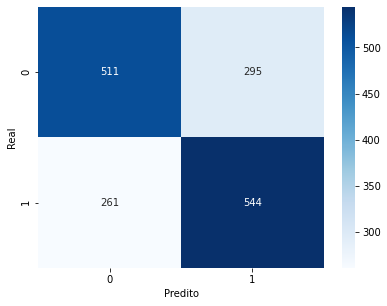

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [38]:
model, X_val, X_test, y_val,y_pred, y_test = train_model(X, y,model_type = 'random_forest',grid_search=False)
print_classification_report(y_val, y_pred)
print(model.get_params())


In [39]:
print(f'\n os pesos do modelo são:{model.feature_importances_} ')


 os pesos do modelo são:[0.47017861 0.28196074 0.01959555 0.2282651 ] 


            imc  hipertensao  ativo_fis      peso
51765  0.146291            0          1  0.187879
17188  0.201005            0          0  0.236364
40649  0.320573            0          0  0.454545
1683   0.179048            0          1  0.242424
17841  0.309396            0          0  0.424242
...         ...          ...        ...       ...
3324   0.190073            1          0  0.242424
17200  0.244103            1          0  0.315152
88     0.188993            1          0  0.266667
47020  0.178366            0          0  0.212121
17060  0.242091            1          0  0.260606

[8058 rows x 4 columns]             imc  hipertensao  ativo_fis      peso
38089  0.326165            0          1  0.375758
23700  0.143089            0          0  0.187879
4011   0.189325            1          0  0.236364
23024  0.178044            1          0  0.169697
30177  0.237656            1          1  0.212121
...         ...          ...        ...       ...
4243   0.232075          

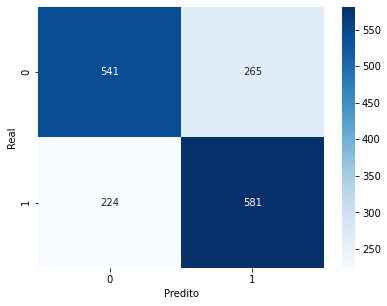

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
# random forest, com gridsearch demora uns 5 minutos

tic = time.perf_counter()
model, X_val, X_test, y_val,y_pred, y_test = train_model(X, y,model_type = 'random_forest',grid_search=True)
toc = time.perf_counter()
print_classification_report(y_val, y_pred)
print(model.get_params())

In [41]:
time_train = toc-tic
print(f"Modelo treinado em {time_train/60:0.4f} minutos")

Modelo treinado em 1.4638 minutos


In [42]:
df_ada

,imc,hipertensao,ativo_fis,peso,diabetes
0,0.204128,1,1,0.266667,0
1,0.158016,0,1,0.163636,0
3,0.144288,0,0,0.193939,0
4,0.190690,0,0,0.218182,0
5,0.177434,1,1,0.230303,0
...,...,...,...,...,...
52435,0.219056,0,0,0.212121,0
52436,0.265560,1,1,0.242424,0
52437,0.237874,1,0,0.266667,0
52438,0.176699,0,0,0.163636,0


In [43]:
print(f'\n os pesos do modelo são:{model.feature_importances_} ')


 os pesos do modelo são:[0.14847049 0.7686538  0.02866586 0.05420984] 
